<center>

# <span style="color:red; font-size:70px;"> Modello di Ising 2D</span>

</center>

In [37]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import ellipk

In [38]:
temp = np.array(['1.0','1.5','2.0','2.5','3.0','3.5'])
t_camp = np.array([1.0, 1.5, 2.0, 2.5, 3.0, 3.5])

<center>

<span style="color:blue; font-size:50px;"> Magnetizzazione</span>

</center>

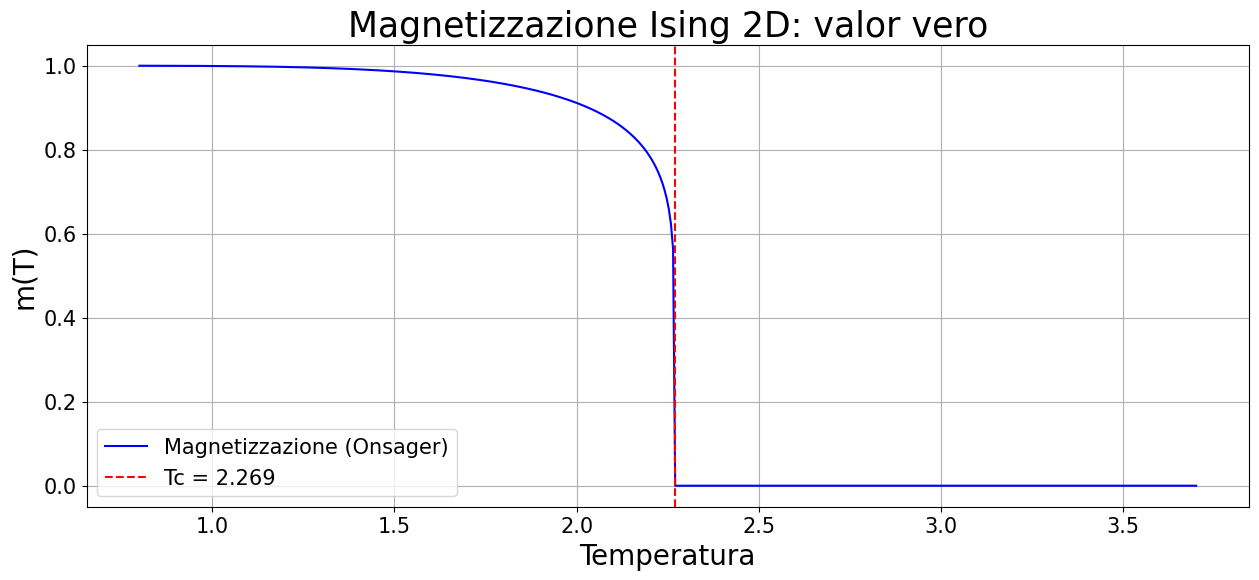

In [52]:
T = np.linspace(0.8, 3.7, 500)
J = 1  
Tc = 2 * J/math.log(1 + np.sqrt(2))

# Funzione per calcolare la magnetizzazione (soluzione di Onsager)
def magnOnsager(T, J, Tc):

    if T > Tc:
        m = 0
    else:
        m = np.sinh(2*J/T)
        m = (1 - m**(-4))**(1/8)
    
    return m


# Calcolo della magnetizzazione per ogni temperatura
m = []
for t in T:
    m.append(magnOnsager(t, J, Tc))

# Creazione del grafico
plt.figure(figsize=(15, 6))
plt.plot(T, m, label=r'Magnetizzazione (Onsager)', color='b')
plt.axvline(x=Tc, color='r', linestyle='--', label=f'Tc = {Tc:.3f}')
plt.xlabel('Temperatura', fontsize = 20)
plt.ylabel('m(T)', fontsize = 20)
plt.title('Magnetizzazione Ising 2D: valor vero', fontsize = 25)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(loc = 'lower left', fontsize = 15)
plt.grid(True)
plt.show()

<center>

<span style="color:blue; font-size:50px;"> Energia interna</span>

</center>

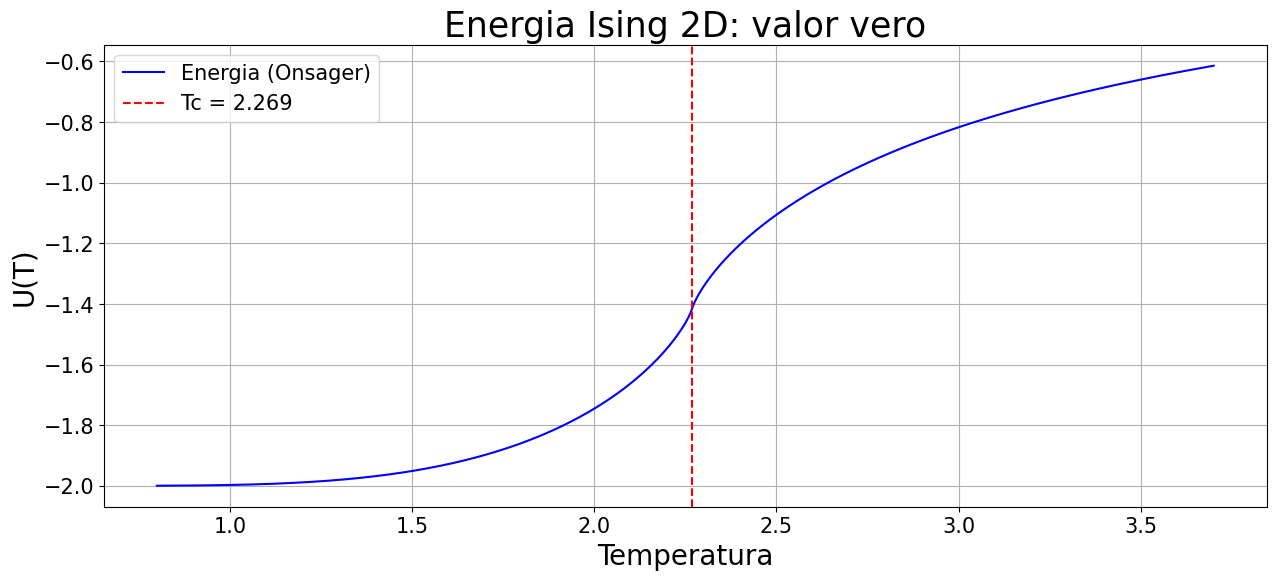

In [40]:
T = np.linspace(0.8, 3.7, 500)
J = 1  
Tc = 2 * J/math.log(1 + np.sqrt(2))

# Funzione per calcolare la magnetizzazione (soluzione di Onsager)
def eneOnsager(T, J):
    
    # Fattore che compare in tutti gli argomenti
    betaJ = J/T
    
    # Componenti per calcolo energia
    k = 2*np.sinh(2*betaJ)/pow(np.cosh(2*betaJ), 2)
    k1 = 2*pow(np.tanh(2*betaJ), 2) - 1
    intE = ellipk(k**2)

    ene = -J * np.cosh(2*betaJ)/np.sinh(2*betaJ) * (1 + 2/np.pi * k1 * intE)

    return ene


# Calcolo della magnetizzazione per ogni temperatura
en = []
for t in T:
    en.append(eneOnsager(t, J))

# Creazione del grafico
plt.figure(figsize=(15, 6))
plt.plot(T, en, label=r'Energia (Onsager)', color='b')
plt.axvline(x=Tc, color='r', linestyle='--', label=f'Tc = {Tc:.3f}')
plt.xlabel('Temperatura', fontsize = 20)
plt.ylabel('U(T)', fontsize = 20)
plt.title('Energia Ising 2D: valor vero', fontsize = 25)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(loc = 'upper left', fontsize = 15)
plt.grid(True)
plt.show()

<center>

# <span style="color:green; font-size:60px;"> Algoritmo di Metropolis</span>

</center>

In [41]:
m_camp = np.zeros(len(temp))
ene_camp = np.zeros(len(temp))

for i in range(0, len(t_camp)):
    m_camp[i] = magnOnsager(t_camp[i], 1.0, Tc)
    ene_camp[i] = eneOnsager(t_camp[i], 1.0)

<center>

<span style="color:blue; font-size:50px;"> Reticolo: 100 x 100</span>

</center>

In [42]:
size = '100'

ene_100 = np.zeros(len(temp))
ene_100_err = np.zeros(len(temp))

magn_100 = np.zeros(len(temp))
magn_100_err = np.zeros(len(temp))


# Ciclo sulle varie temperature
for i in range(0, len(temp)):

    name = 'metro/obs/obs_size' + size + '_t' + temp[i] + '.out'
    obs = np.loadtxt(name)


    # Valuto i valori medi
    ene_100[i] = np.mean(obs[:, 1])
    ene_100_err[i] = np.std(obs[:, 1], ddof=1)

    magn_100[i] = np.mean(obs[:, 2])
    magn_100_err[i] = np.std(obs[:, 2], ddof=1)

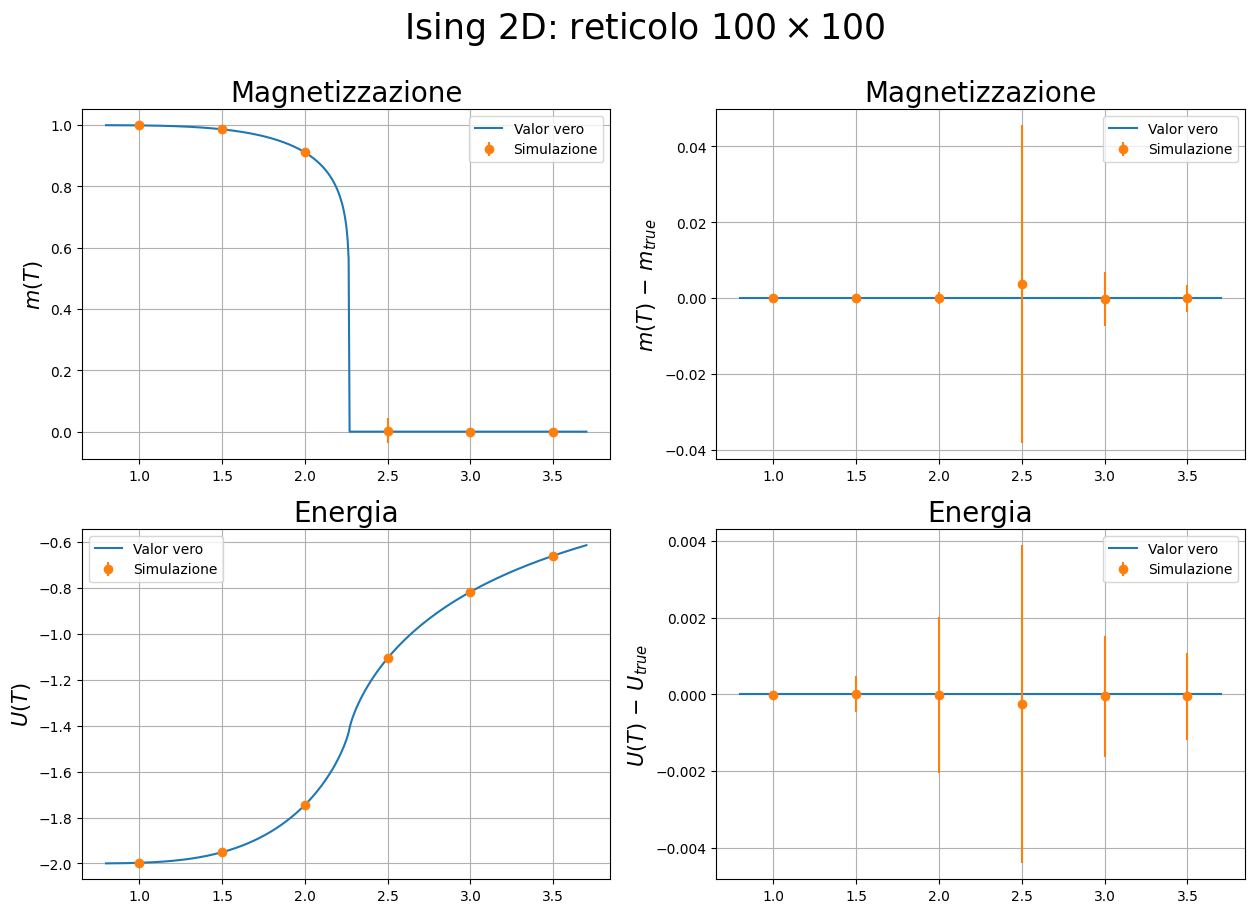

In [43]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

ax[0, 0].plot(T, m, label = 'Valor vero')
ax[0, 0].errorbar(t_camp, magn_100, yerr = magn_100_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[0, 0].set_ylabel(r'$m\left(T\right)$', fontsize = 15)
ax[0, 0].set_title(r'Magnetizzazione', fontsize = 20)
ax[0, 0].legend(loc = 'best')
ax[0, 0].grid(True)

ax[0, 1].plot(T, np.zeros(len(T)), label = 'Valor vero')
ax[0, 1].errorbar(t_camp, magn_100 - m_camp, yerr = magn_100_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[0, 1].set_ylabel(r'$m\left(T\right)\,-\,m_{true}$', fontsize = 15)
ax[0, 1].set_title(r'Magnetizzazione', fontsize = 20)
ax[0, 1].legend(loc = 'best')
ax[0, 1].grid(True)

ax[1, 0].plot(T, en, label = 'Valor vero')
ax[1, 0].errorbar(t_camp, ene_100, yerr = ene_100_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[1, 0].set_ylabel(r'$U\left(T\right)$', fontsize = 15)
ax[1, 0].set_title(r'Energia', fontsize = 20)
ax[1, 0].legend(loc = 'best')
ax[1, 0].grid(True)

ax[1, 1].plot(T, np.zeros(len(T)), label = 'Valor vero')
ax[1, 1].errorbar(t_camp, ene_100 - ene_camp, yerr = ene_100_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[1, 1].set_ylabel(r'$U\left(T\right)\,-\,U_{true}$', fontsize = 15)
ax[1, 1].set_title(r'Energia', fontsize = 20)
ax[1, 1].legend(loc = 'best')
ax[1, 1].grid(True)

fig.suptitle(r'Ising 2D: reticolo $100 \times 100$', fontsize = 25)
plt.show()

<center>

<span style="color:blue; font-size:50px;"> Reticolo: 200 x 200</span>

</center>

In [44]:
size = '200'

ene_200 = np.zeros(len(temp))
ene_200_err = np.zeros(len(temp))

magn_200 = np.zeros(len(temp))
magn_200_err = np.zeros(len(temp))


# Ciclo sulle varie temperature
for i in range(0, len(temp)):

    name = 'metro/obs/obs_size' + size + '_t' + temp[i] + '.out'
    obs = np.loadtxt(name)


    # Valuto i valori medi
    ene_200[i] = np.mean(obs[:, 1])
    ene_200_err[i] = np.std(obs[:, 1], ddof=1)

    magn_200[i] = np.mean(obs[:, 2])
    magn_200_err[i] = np.std(obs[:, 2], ddof=1)

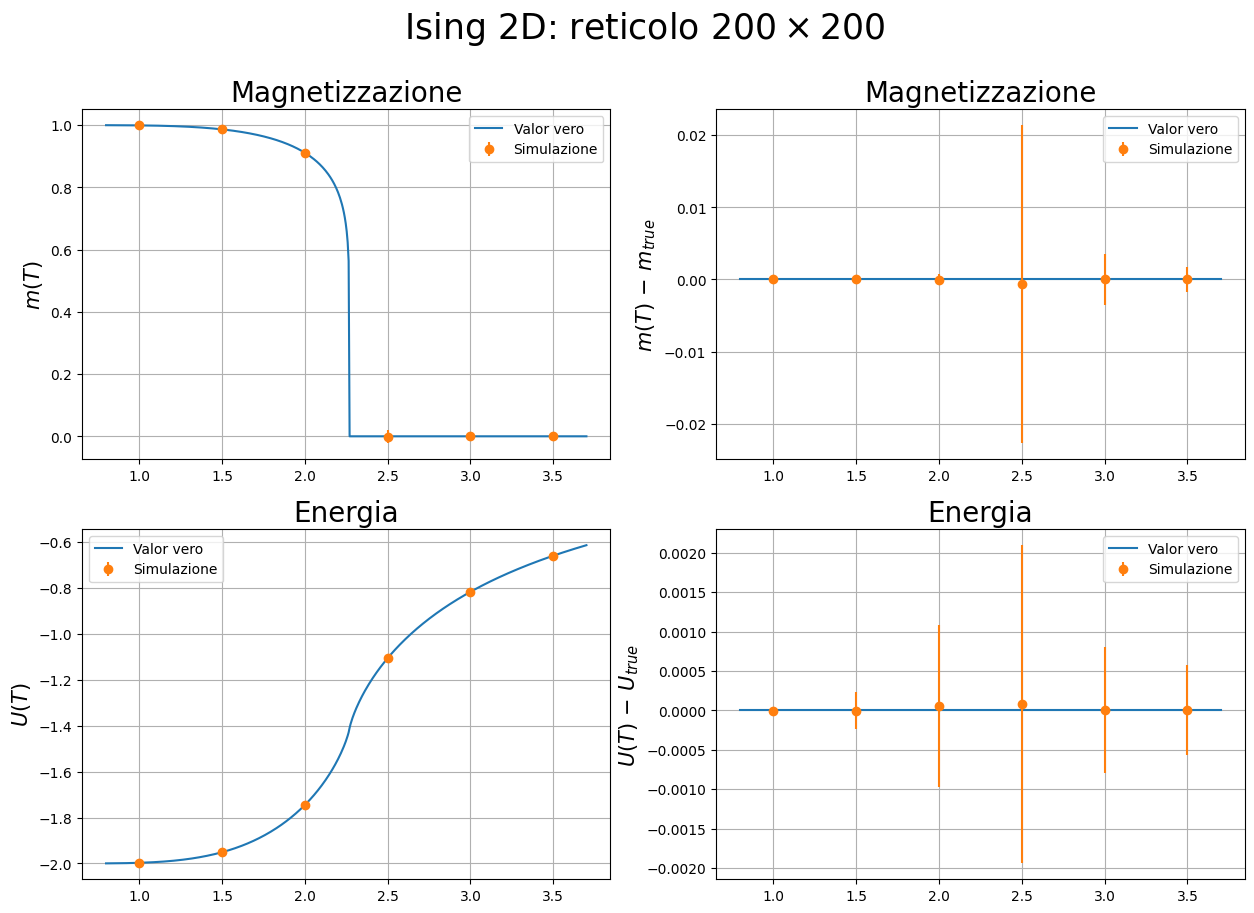

In [45]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

ax[0, 0].plot(T, m, label = 'Valor vero')
ax[0, 0].errorbar(t_camp, magn_200, yerr = magn_200_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[0, 0].set_ylabel(r'$m\left(T\right)$', fontsize = 15)
ax[0, 0].set_title(r'Magnetizzazione', fontsize = 20)
ax[0, 0].legend(loc = 'best')
ax[0, 0].grid(True)

ax[0, 1].plot(T, np.zeros(len(T)), label = 'Valor vero')
ax[0, 1].errorbar(t_camp, magn_200 - m_camp, yerr = magn_200_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[0, 1].set_ylabel(r'$m\left(T\right)\,-\,m_{true}$', fontsize = 15)
ax[0, 1].set_title(r'Magnetizzazione', fontsize = 20)
ax[0, 1].legend(loc = 'best')
ax[0, 1].grid(True)

ax[1, 0].plot(T, en, label = 'Valor vero')
ax[1, 0].errorbar(t_camp, ene_200, yerr = ene_200_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[1, 0].set_ylabel(r'$U\left(T\right)$', fontsize = 15)
ax[1, 0].set_title(r'Energia', fontsize = 20)
ax[1, 0].legend(loc = 'best')
ax[1, 0].grid(True)

ax[1, 1].plot(T, np.zeros(len(T)), label = 'Valor vero')
ax[1, 1].errorbar(t_camp, ene_200 - ene_camp, yerr = ene_200_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[1, 1].set_ylabel(r'$U\left(T\right)\,-\,U_{true}$', fontsize = 15)
ax[1, 1].set_title(r'Energia', fontsize = 20)
ax[1, 1].legend(loc = 'best')
ax[1, 1].grid(True)

fig.suptitle(r'Ising 2D: reticolo $200 \times 200$', fontsize = 25)
plt.show()

<center>

<span style="color:blue; font-size:50px;"> Reticolo: 300 x 300</span>

</center>

In [46]:
size = '300'

ene_300 = np.zeros(len(temp))
ene_300_err = np.zeros(len(temp))

magn_300 = np.zeros(len(temp))
magn_300_err = np.zeros(len(temp))


# Ciclo sulle varie temperature
for i in range(0, len(temp)):

    name = 'metro/obs/obs_size' + size + '_t' + temp[i] + '.out'
    obs = np.loadtxt(name)


    # Valuto i valori medi
    ene_300[i] = np.mean(obs[:, 1])
    ene_300_err[i] = np.std(obs[:, 1], ddof=1)

    magn_300[i] = np.mean(obs[:, 2])
    magn_300_err[i] = np.std(obs[:, 2], ddof=1)

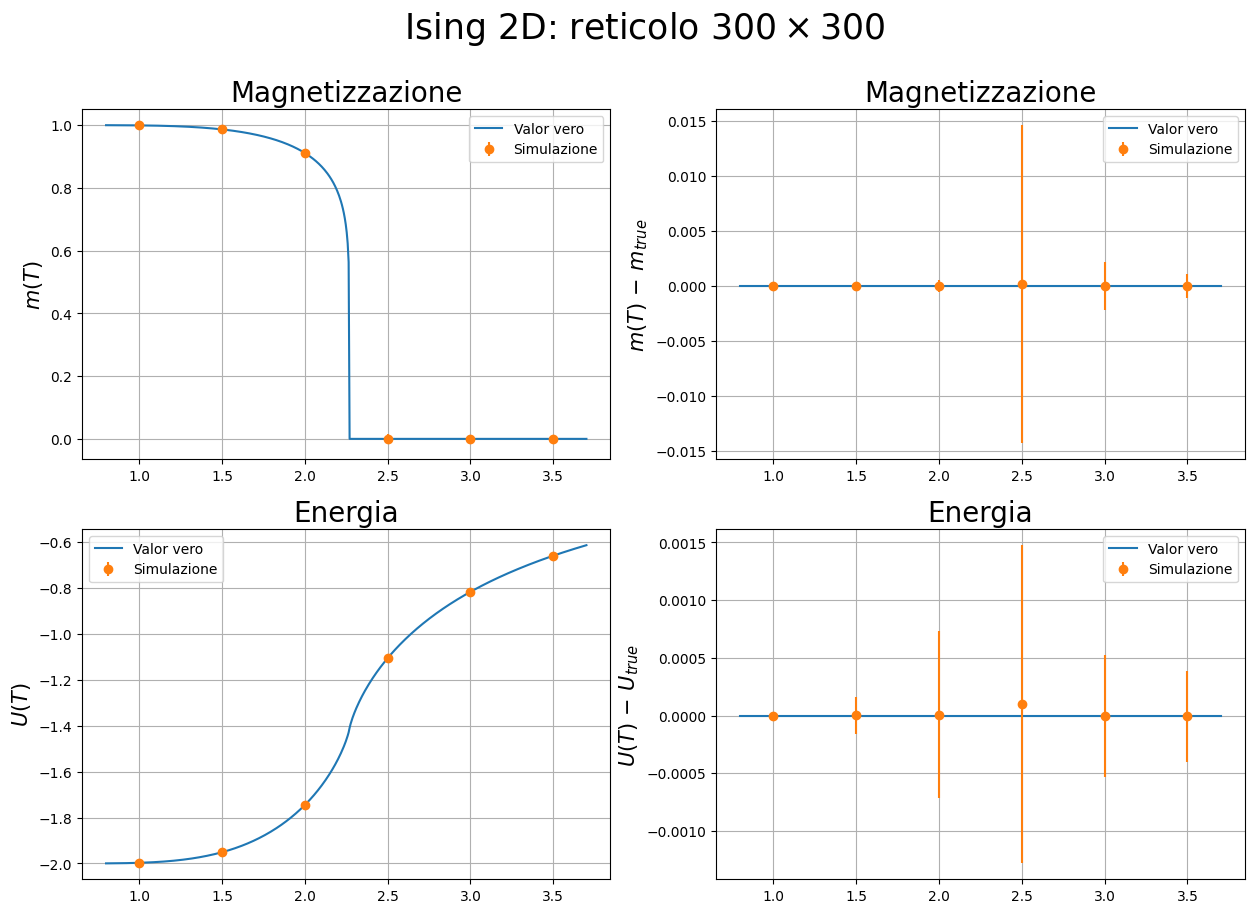

In [47]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

ax[0, 0].plot(T, m, label = 'Valor vero')
ax[0, 0].errorbar(t_camp, magn_300, yerr = magn_300_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[0, 0].set_ylabel(r'$m\left(T\right)$', fontsize = 15)
ax[0, 0].set_title(r'Magnetizzazione', fontsize = 20)
ax[0, 0].legend(loc = 'best')
ax[0, 0].grid(True)

ax[0, 1].plot(T, np.zeros(len(T)), label = 'Valor vero')
ax[0, 1].errorbar(t_camp, magn_300 - m_camp, yerr = magn_300_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[0, 1].set_ylabel(r'$m\left(T\right)\,-\,m_{true}$', fontsize = 15)
ax[0, 1].set_title(r'Magnetizzazione', fontsize = 20)
ax[0, 1].legend(loc = 'best')
ax[0, 1].grid(True)

ax[1, 0].plot(T, en, label = 'Valor vero')
ax[1, 0].errorbar(t_camp, ene_300, yerr = ene_300_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[1, 0].set_ylabel(r'$U\left(T\right)$', fontsize = 15)
ax[1, 0].set_title(r'Energia', fontsize = 20)
ax[1, 0].legend(loc = 'best')
ax[1, 0].grid(True)

ax[1, 1].plot(T, np.zeros(len(T)), label = 'Valor vero')
ax[1, 1].errorbar(t_camp, ene_300 - ene_camp, yerr = ene_300_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[1, 1].set_ylabel(r'$U\left(T\right)\,-\,U_{true}$', fontsize = 15)
ax[1, 1].set_title(r'Energia', fontsize = 20)
ax[1, 1].legend(loc = 'best')
ax[1, 1].grid(True)

fig.suptitle(r'Ising 2D: reticolo $300 \times 300$', fontsize = 25)
plt.show()

<center>

<span style="color:blue; font-size:50px;"> Reticolo: 400 x 400</span>

</center>

In [48]:
size = '400'

ene_400 = np.zeros(len(temp))
ene_400_err = np.zeros(len(temp))

magn_400 = np.zeros(len(temp))
magn_400_err = np.zeros(len(temp))


# Ciclo sulle varie temperature
for i in range(0, len(temp)):

    name = 'metro/obs/obs_size' + size + '_t' + temp[i] + '.out'
    obs = np.loadtxt(name)


    # Valuto i valori medi
    ene_400[i] = np.mean(obs[:, 1])
    ene_400_err[i] = np.std(obs[:, 1], ddof=1)

    magn_400[i] = np.mean(obs[:, 2])
    magn_400_err[i] = np.std(obs[:, 2], ddof=1)

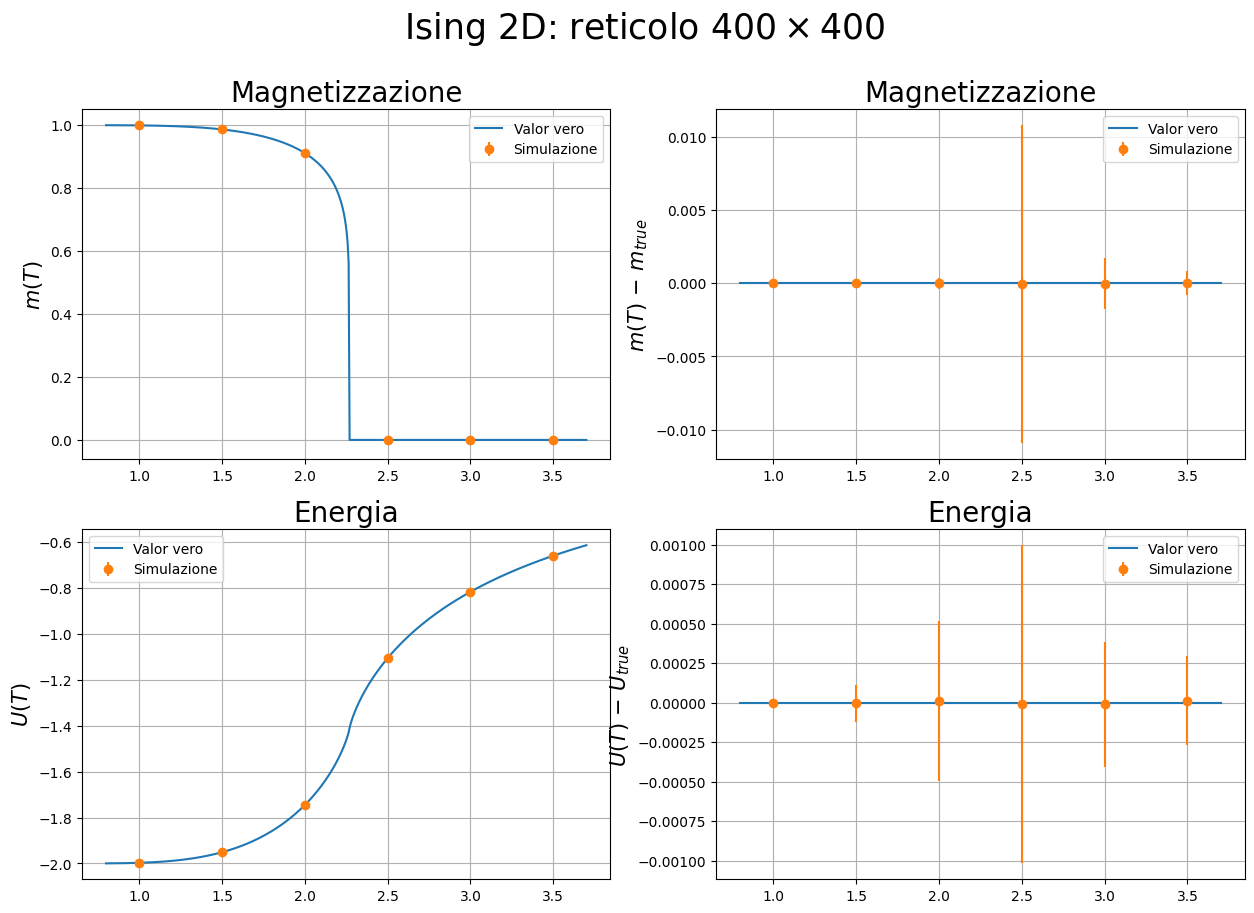

In [49]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

ax[0, 0].plot(T, m, label = 'Valor vero')
ax[0, 0].errorbar(t_camp, magn_400, yerr = magn_400_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[0, 0].set_ylabel(r'$m\left(T\right)$', fontsize = 15)
ax[0, 0].set_title(r'Magnetizzazione', fontsize = 20)
ax[0, 0].legend(loc = 'best')
ax[0, 0].grid(True)

ax[0, 1].plot(T, np.zeros(len(T)), label = 'Valor vero')
ax[0, 1].errorbar(t_camp, magn_400 - m_camp, yerr = magn_400_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[0, 1].set_ylabel(r'$m\left(T\right)\,-\,m_{true}$', fontsize = 15)
ax[0, 1].set_title(r'Magnetizzazione', fontsize = 20)
ax[0, 1].legend(loc = 'best')
ax[0, 1].grid(True)

ax[1, 0].plot(T, en, label = 'Valor vero')
ax[1, 0].errorbar(t_camp, ene_400, yerr = ene_400_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[1, 0].set_ylabel(r'$U\left(T\right)$', fontsize = 15)
ax[1, 0].set_title(r'Energia', fontsize = 20)
ax[1, 0].legend(loc = 'best')
ax[1, 0].grid(True)

ax[1, 1].plot(T, np.zeros(len(T)), label = 'Valor vero')
ax[1, 1].errorbar(t_camp, ene_400 - ene_camp, yerr = ene_400_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[1, 1].set_ylabel(r'$U\left(T\right)\,-\,U_{true}$', fontsize = 15)
ax[1, 1].set_title(r'Energia', fontsize = 20)
ax[1, 1].legend(loc = 'best')
ax[1, 1].grid(True)

fig.suptitle(r'Ising 2D: reticolo $400 \times 400$', fontsize = 25)
plt.show()

<center>

<span style="color:blue; font-size:50px;"> Reticolo: 500 x 500</span>

</center>

In [50]:
size = '500'

ene_500 = np.zeros(len(temp))
ene_500_err = np.zeros(len(temp))

magn_500 = np.zeros(len(temp))
magn_500_err = np.zeros(len(temp))


# Ciclo sulle varie temperature
for i in range(0, len(temp)):

    name = 'metro/obs/obs_size' + size + '_t' + temp[i] + '.out'
    obs = np.loadtxt(name)


    # Valuto i valori medi
    ene_500[i] = np.mean(obs[:, 1])
    ene_500_err[i] = np.std(obs[:, 1], ddof=1)

    magn_500[i] = np.mean(obs[:, 2])
    magn_500_err[i] = np.std(obs[:, 2], ddof=1)

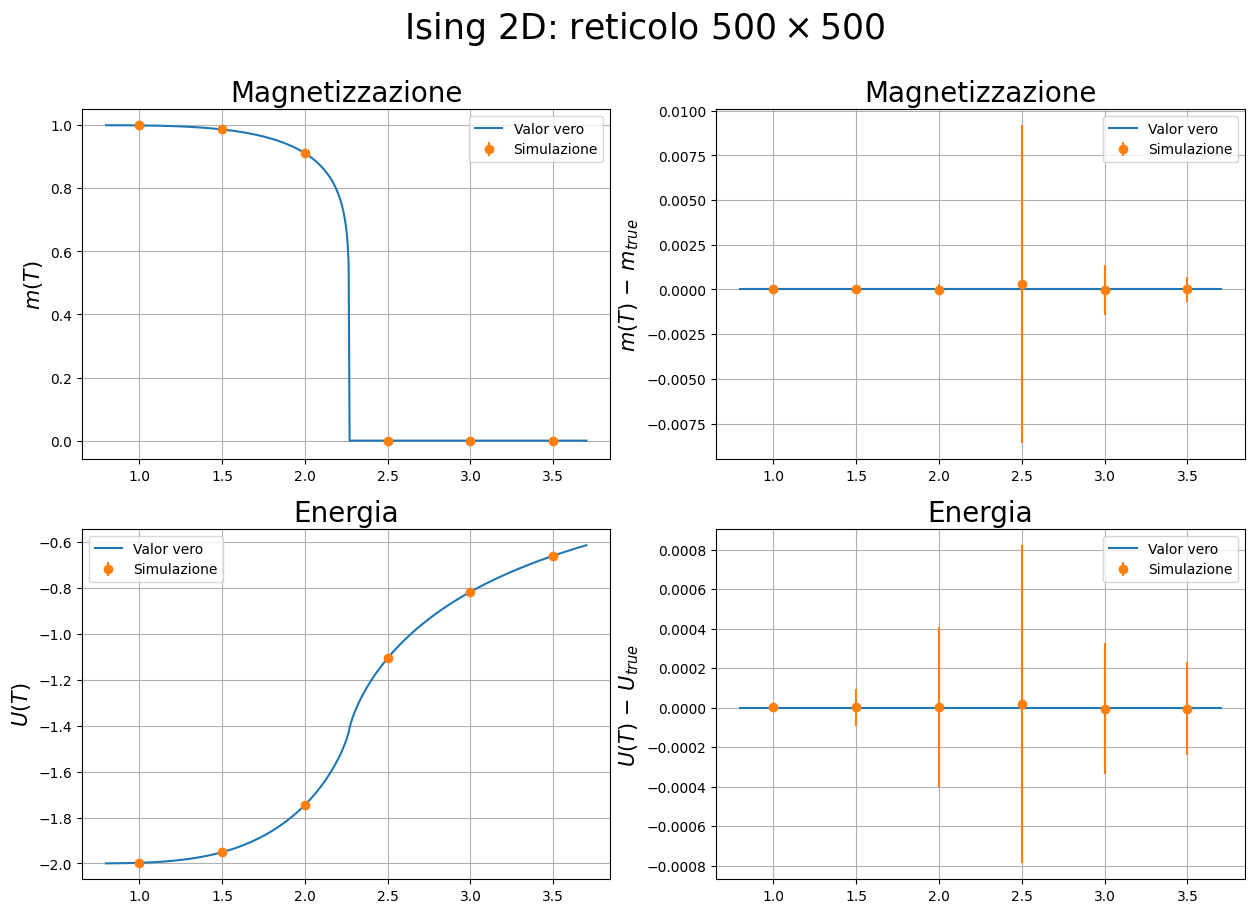

In [51]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

ax[0, 0].plot(T, m, label = 'Valor vero')
ax[0, 0].errorbar(t_camp, magn_500, yerr = magn_500_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[0, 0].set_ylabel(r'$m\left(T\right)$', fontsize = 15)
ax[0, 0].set_title(r'Magnetizzazione', fontsize = 20)
ax[0, 0].legend(loc = 'best')
ax[0, 0].grid(True)

ax[0, 1].plot(T, np.zeros(len(T)), label = 'Valor vero')
ax[0, 1].errorbar(t_camp, magn_500 - m_camp, yerr = magn_500_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[0, 1].set_ylabel(r'$m\left(T\right)\,-\,m_{true}$', fontsize = 15)
ax[0, 1].set_title(r'Magnetizzazione', fontsize = 20)
ax[0, 1].legend(loc = 'best')
ax[0, 1].grid(True)

ax[1, 0].plot(T, en, label = 'Valor vero')
ax[1, 0].errorbar(t_camp, ene_500, yerr = ene_500_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[1, 0].set_ylabel(r'$U\left(T\right)$', fontsize = 15)
ax[1, 0].set_title(r'Energia', fontsize = 20)
ax[1, 0].legend(loc = 'best')
ax[1, 0].grid(True)

ax[1, 1].plot(T, np.zeros(len(T)), label = 'Valor vero')
ax[1, 1].errorbar(t_camp, ene_500 - ene_camp, yerr = ene_500_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[1, 1].set_ylabel(r'$U\left(T\right)\,-\,U_{true}$', fontsize = 15)
ax[1, 1].set_title(r'Energia', fontsize = 20)
ax[1, 1].legend(loc = 'best')
ax[1, 1].grid(True)

fig.suptitle(r'Ising 2D: reticolo $500 \times 500$', fontsize = 25)
plt.show()